# Exercise 1 - American Airlines Employees

In [1]:
install.packages("dplyr")
install.packages("ggplot2")
install.packages("tidyverse")
install.packages("gridExtra")

Warning message:
“unable to access index for repository https://cran.r-project.org/src/contrib:
  cannot open URL 'https://cran.r-project.org/src/contrib/PACKAGES'”
Warning message:
“package ‘dplyr’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Warning message:
“unable to access index for repository https://cran.r-project.org/src/contrib:
  cannot open URL 'https://cran.r-project.org/src/contrib/PACKAGES'”
Warning message:
“package ‘ggplot2’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Warning message:
“unable to access index for repository https://cran.r-project.org/src/contrib:
  cannot open URL 'https://cran.r-project.org/src/contrib/PACKAGES'”

In [2]:
library(readr)
library(dplyr)
library(lubridate)
library(ggplot2)
library(gridExtra)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




### 1. Read the data and import them in a data.frame or tibble structure

In [3]:
N_comp = 4

data_aa <- read_tsv("work/First_assignment/american_airline_empl.txt", show_col_types = FALSE)
data_de <- read_tsv("work/First_assignment/delta_airline_empl.txt", show_col_types = FALSE)
data_fe <- read_tsv("work/First_assignment/federal_express_empl.txt", show_col_types = FALSE)
data_ua <- read_tsv("work/First_assignment/united_airline_empl.txt", show_col_types = FALSE)

Add a column containing the Airline name to each tibble

In [4]:
data_aa <- mutate(data_aa, Company = "American Airline")
data_de <- mutate(data_de, Company = "Delta Airline")
data_fe <- mutate(data_fe, Company = "Federal Express")
data_ua <- mutate(data_ua, Company = "United Airline")

### 2. Merge the four data tibble in a common tibble

In [5]:
data <- bind_rows(data_aa, data_de, data_fe, data_ua)

### 3. Produce a plot of the behaviour of the employees as a function of time for all four companies, separately for the number of full-time and part-time employees

In [6]:
data <- mutate(data, Date=make_date(year = data$Year, month = data$Month))

In [7]:
#This is needed for ggplot2 column name conversion reasons
data <- rename(data, Full_time = "Full-time")
data <- rename(data, Part_time = "Part-time")
data <- rename(data, Grand_total = "Grand Total")

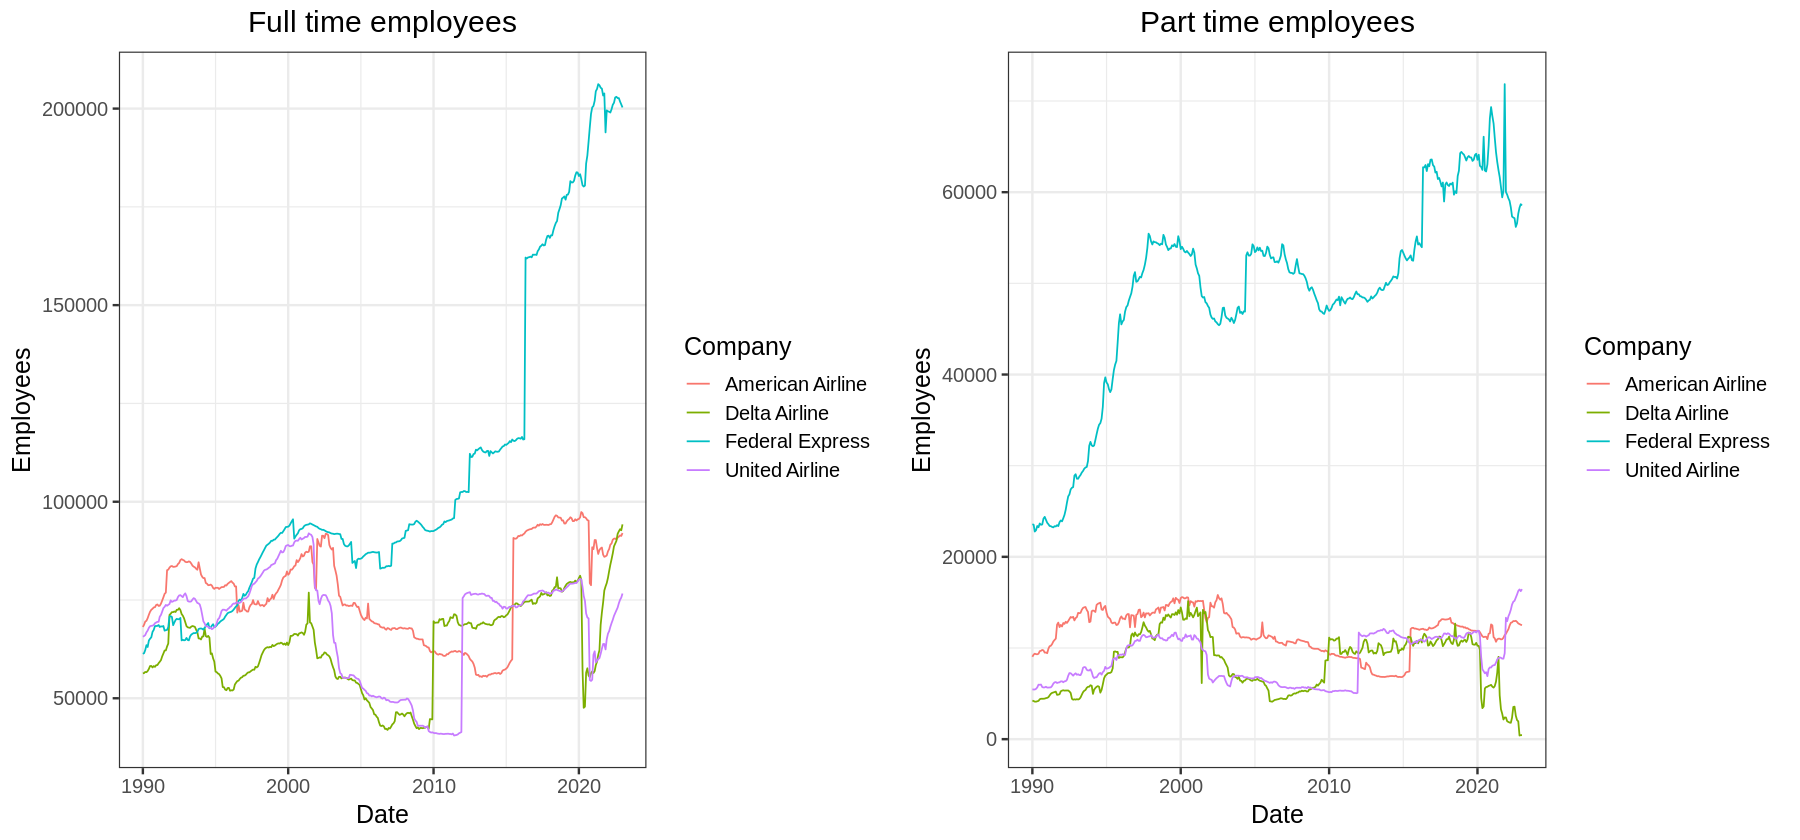

In [8]:
full_time <- ggplot(data, aes(x=Date, y=Full_time, colour=Company))+ geom_line() + theme_bw(base_size=15) + labs(y= "Employees", title="Full time employees") + theme(plot.title=element_text(hjust=0.5))
part_time <- ggplot(data, aes(x=Date, y=Part_time, colour=Company))+ geom_line() + theme_bw(base_size=15) + labs(y= "Employees", title="Part time employees") + theme(plot.title=element_text(hjust=0.5))

options(repr.plot.width=15, repr.plot.height=7)
grid.arrange(full_time, part_time, ncol = 2)

### 4. When did each company reach the minimum and maximum number of employees ?

In [9]:
data |> group_by(Company) |> 
        filter(Grand_total == max(Grand_total)) |> 
        select(Company, Date, Grand_total) -> max_empl
max_empl

Company          Date       Grand_total
1 American Airline 2018-06-01 109171     
2 Delta Airline    2023-01-01  94675     
3 Federal Express  2021-03-01 270383     
4 United Airline   2001-03-01 102046

In [10]:
data |> group_by(Company) |> 
        filter(Grand_total == min(Grand_total)) |> 
        select(Company, Date, Grand_total) -> min_empl
min_empl

Company          Date       Grand_total
1 American Airline 2013-09-01 62290      
2 Delta Airline    2006-11-01 46410      
3 Federal Express  1990-01-01 84885      
4 United Airline   2011-06-01 45781

### 5. Plot the fraction of part-time worker over the total employees as a function of time

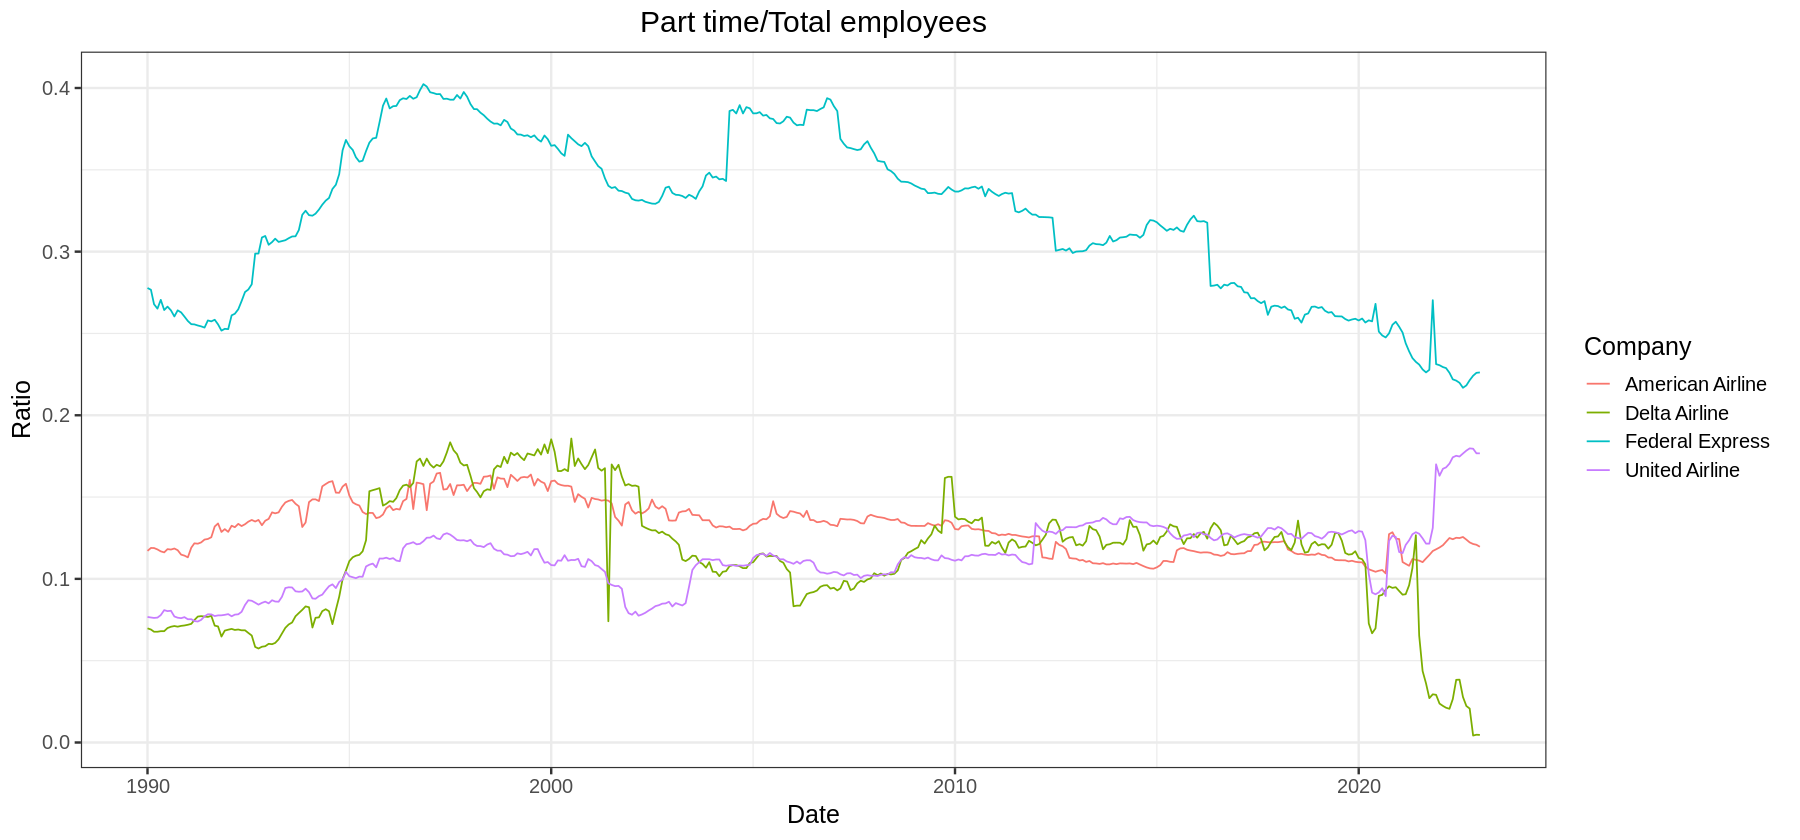

In [11]:
part_total <- ggplot(data, aes(x=Date, y=Part_time/Grand_total, colour=Company))+ geom_line()+theme_bw(base_size=15) + labs(y= "Ratio", title="Part time/Total employees") + theme(plot.title=element_text(hjust=0.5))

options(repr.plot.width=15, repr.plot.height=7)
show(part_total)

### 6. Did the COVID-19 pandemic have any influence in the employed workers of the airline companies? Can you see a trend in the years 2019-2023 ?

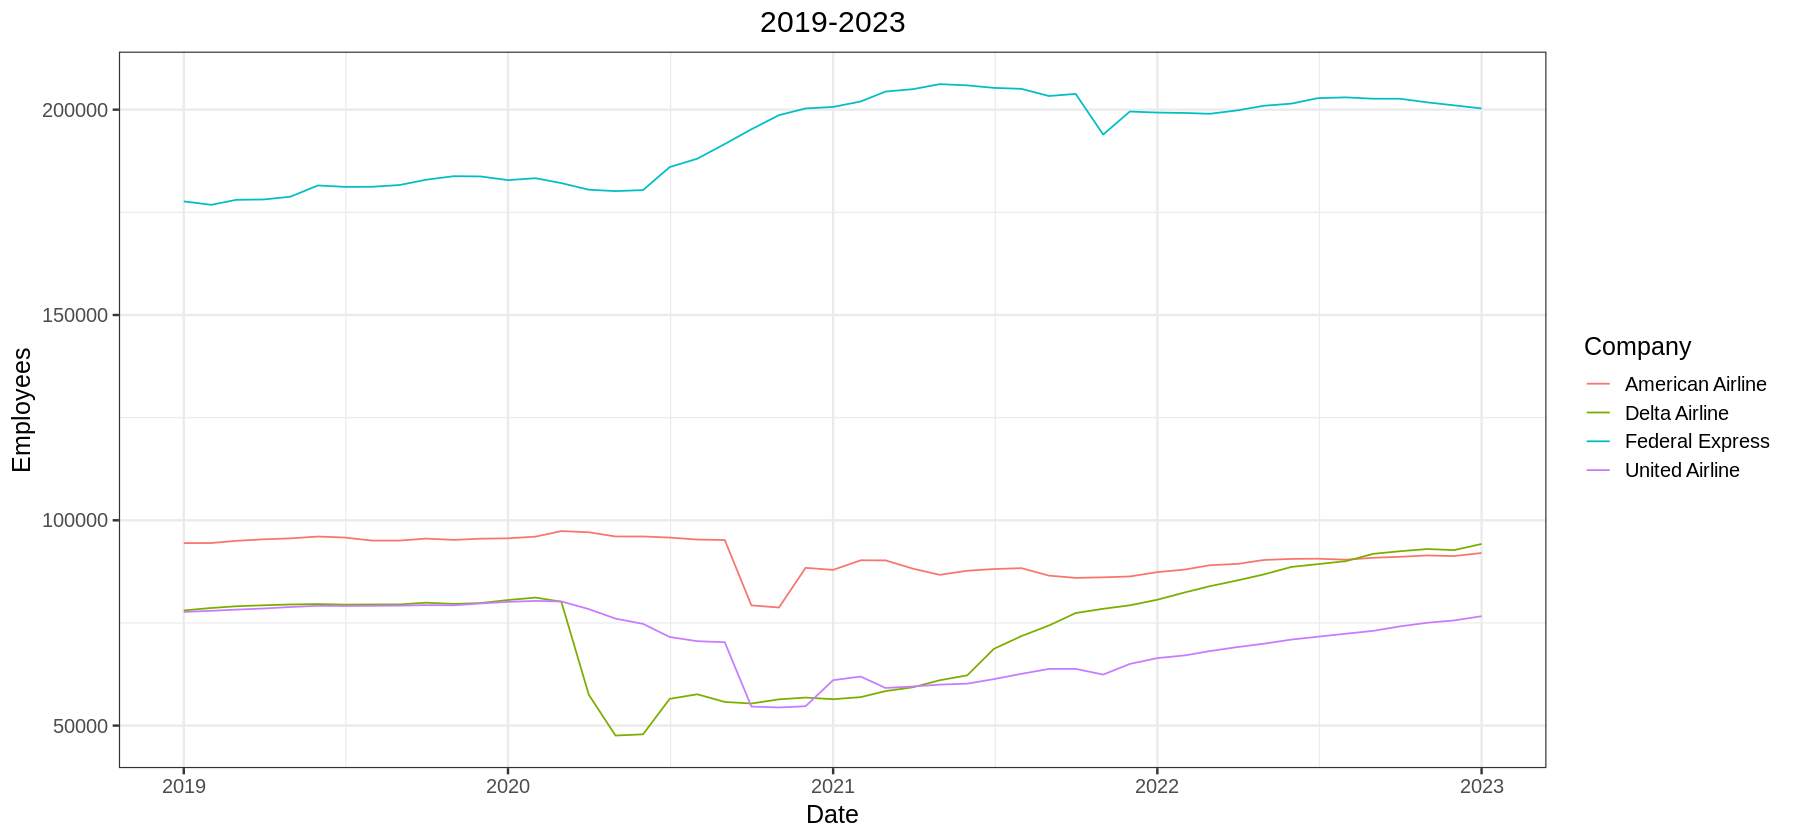

In [12]:
covid <- ggplot(filter(data, Year >= 2019 & Year <=2023), aes(x=Date, y=Full_time, colour=Company))+ geom_line()+theme_bw(base_size=15) + labs(y= "Employees", title="2019-2023") + theme(plot.title=element_text(hjust=0.5))

options(repr.plot.width=15, repr.plot.height=7)
show(covid)

We can see a general decrease in airline companies employees, starting from the first months of 2020, followed by a steady increment.
The only exception is the Federal Express, that during the pandemic saw a rise in the number of employees (probably caused by the increase in package deliveries) 

# Exercise 2 - Data Frames and Tibble

In [13]:
install.packages("nycflights13")

Warning message:
“unable to access index for repository https://cran.r-project.org/src/contrib:
  cannot open URL 'https://cran.r-project.org/src/contrib/PACKAGES'”
Warning message:
“package ‘nycflights13’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [14]:
library(nycflights13)
library(lubridate)
library(dplyr)
library(ggplot2)
library(gridExtra)

### 1. Plot the total number of flights departed from each of the three NYC airports as a function of time (one entry for each of the 365 days of the year).

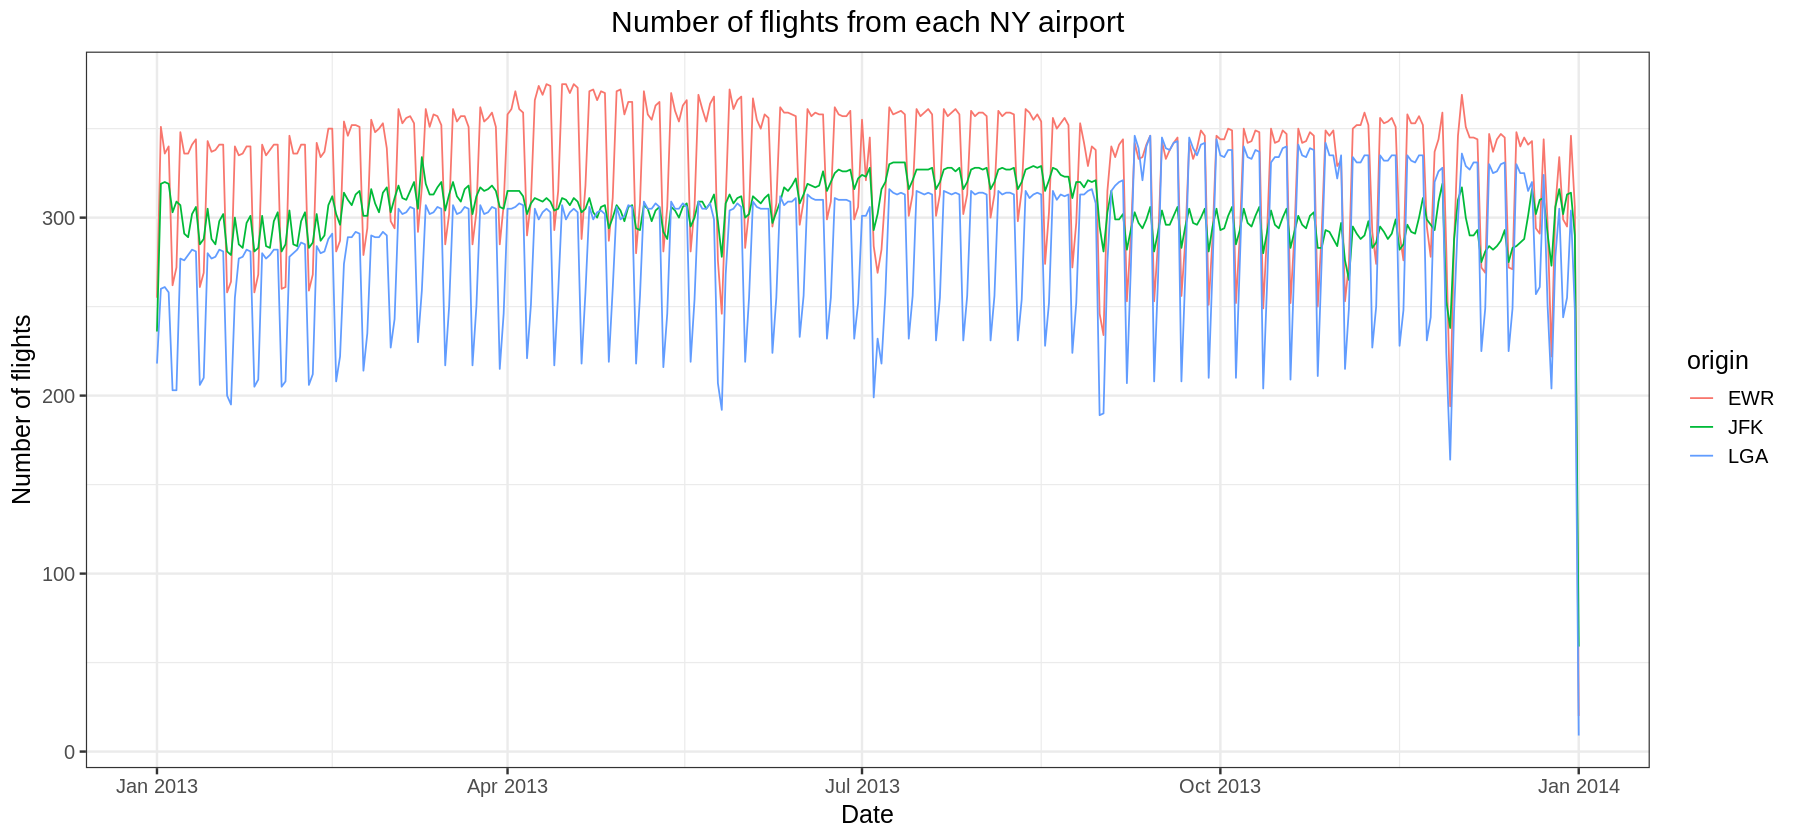

In [15]:
flights |> group_by(Date= as.Date(time_hour), origin) |> 
           count() -> dep

n_flights <- ggplot(dep, aes(x=Date, y=n, colour=origin))+ geom_line()+theme_bw(base_size=15)+ labs(y="Number of flights", title="Number of flights from each NY airport") + theme(plot.title=element_text(hjust=0.5))

options(repr.plot.width=15, repr.plot.height=7)
show(n_flights)

### 2. Plot the average number of flights computed over the first five working days of each week as a function of the week number of the year. Produce the same plot for the flights departing over the weekend (Saturdays and Sundays).

In [16]:
flights |> group_by(Date= as.Date(time_hour)) |> 
           count() -> dep

dep <- mutate(dep, weekday=weekdays(Date))
dep <- mutate(dep, week=week(Date))

In [17]:
dep |> filter(weekday != "Saturday" & weekday != "Sunday") |> 
       group_by(week) |> 
       summarise(mean=mean(n)) ->working_days

dep |> filter(weekday == "Saturday" | weekday == "Sunday") |> 
       group_by(week) |> 
       summarise(mean=mean(n)) ->lazy_days

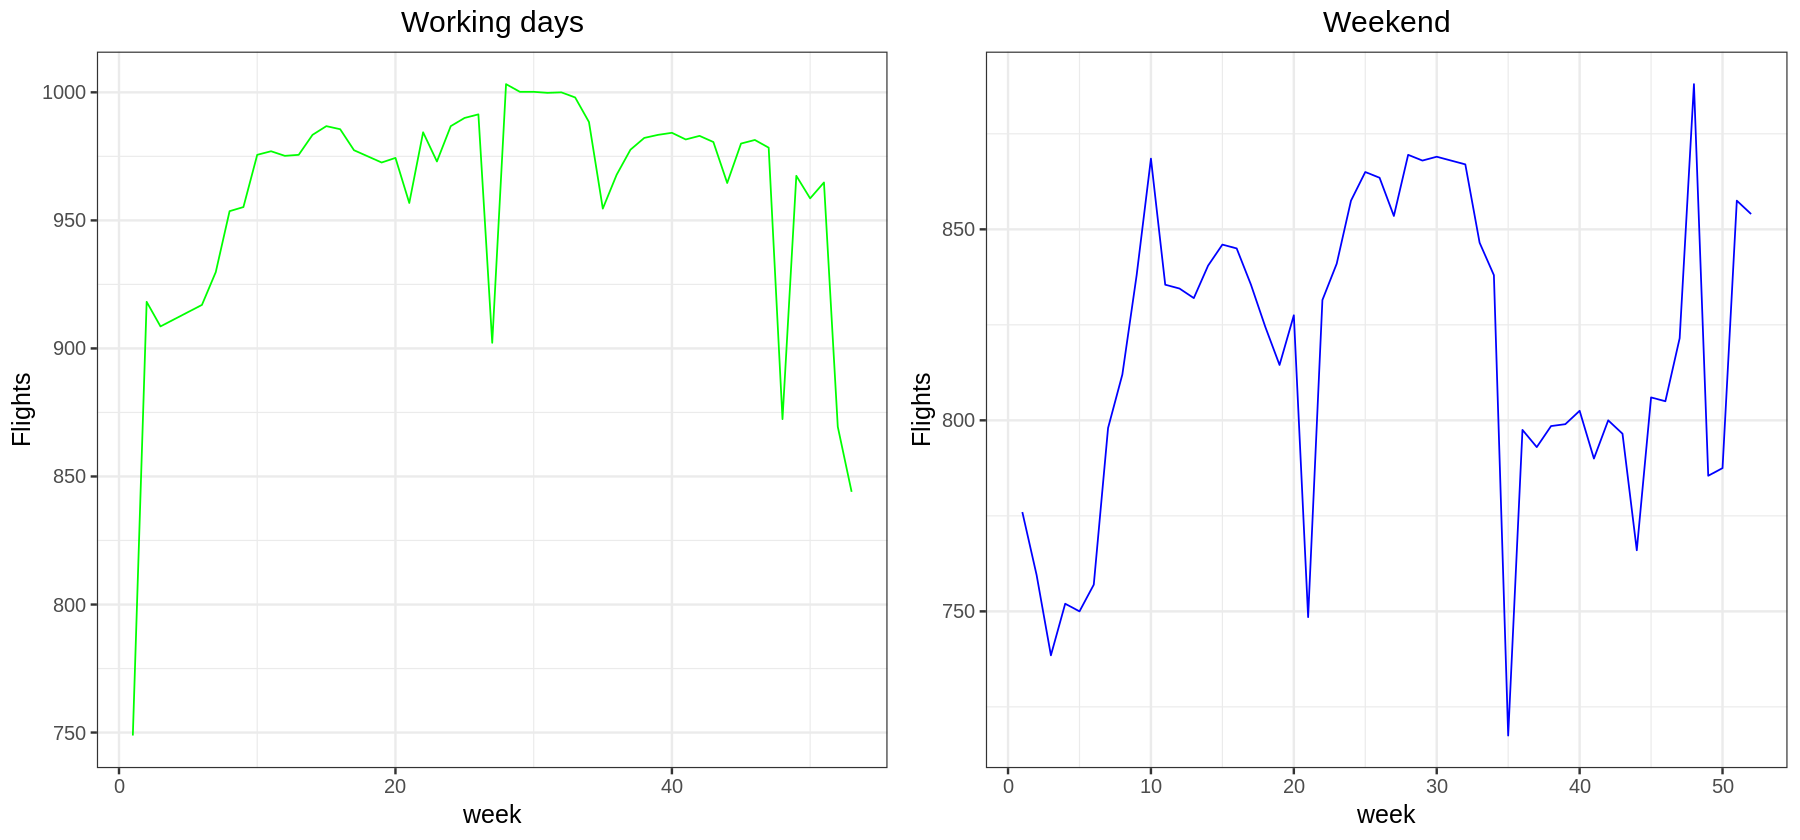

In [18]:
working <- ggplot(working_days, aes(x=week, y=mean))+ geom_line(color="green")+theme_bw(base_size=15) + labs(y= "Flights", title="Working days") + theme(plot.title=element_text(hjust=0.5))
weekend <- ggplot(lazy_days, aes(x=week, y=mean)) + geom_line(color="blue")+theme_bw(base_size=15) + labs(y= "Flights", title="Weekend") + theme(plot.title=element_text(hjust=0.5))

options(repr.plot.width=15, repr.plot.height=7)
grid.arrange(working, weekend, ncol = 2)

### 3. For each flight in the data frame, compute the departure delay and extract the following pieces of information (separately for each NYC airport): min, max and average delay for each day of the year (show the data in corresponding plots)

`summarise()` has grouped output by 'origin'. You can override using the
`.groups` argument.


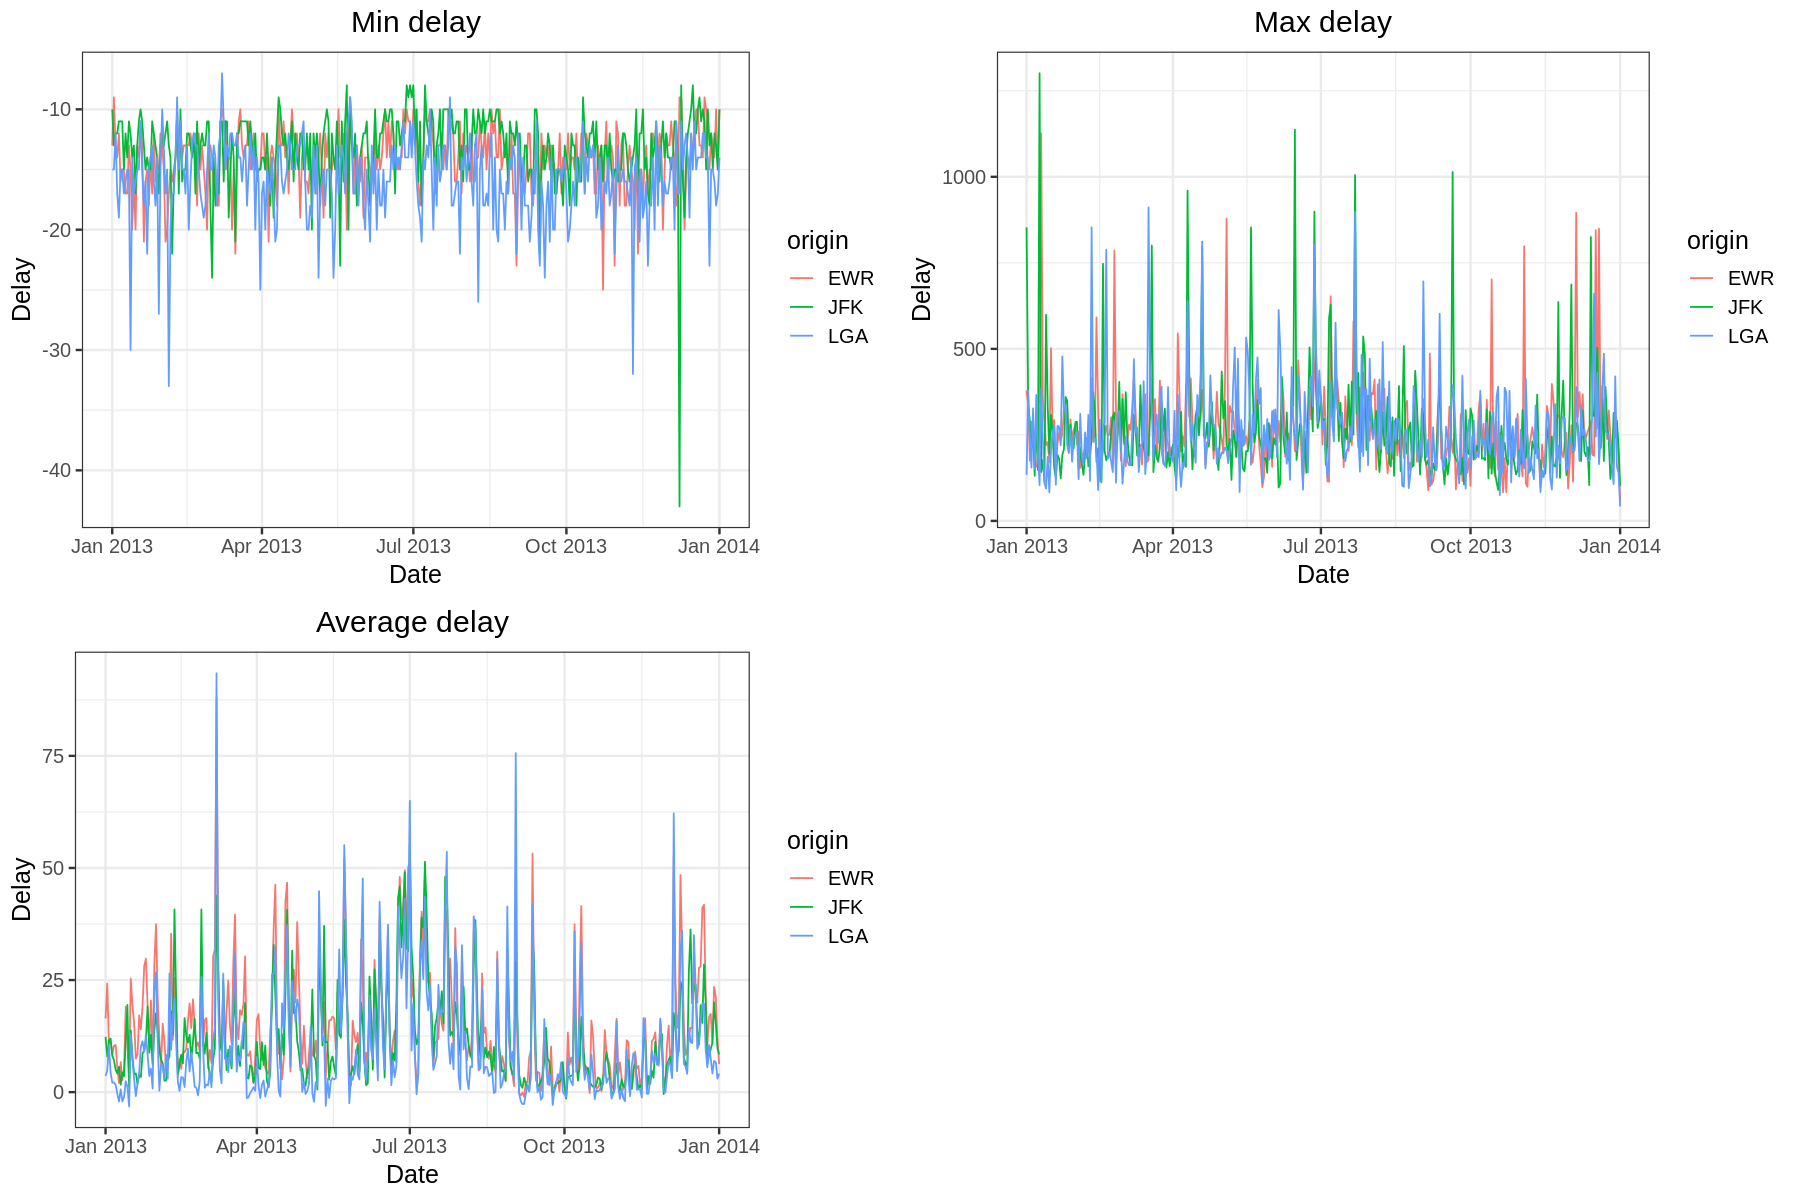

In [19]:
flights_na <- na.omit(flights)

flights_na |> group_by(origin, Date=as.Date(time_hour)) |> 
              summarise(min=min(dep_delay), max=max(dep_delay), avg_delay=mean(dep_delay)) -> delays

#plots
min <- ggplot(delays, aes(y=min, x=Date, col=origin))+ geom_line()+theme_bw(base_size=15) + labs(y= "Delay", title="Min delay") + theme(plot.title=element_text(hjust=0.5))
max <- ggplot(delays, aes(y=max, x=Date, col=origin))+ geom_line()+theme_bw(base_size=15) + labs(y= "Delay", title="Max delay") + theme(plot.title=element_text(hjust=0.5))
average <- ggplot(delays, aes(y=avg_delay, x=Date, col=origin))+ geom_line()+theme_bw(base_size=15) + labs(y= "Delay", title="Average delay") + theme(plot.title=element_text(hjust=0.5))

options(repr.plot.width=15, repr.plot.height=10)
grid.arrange(min, max, average, ncol = 2)

### 4. Assuming the distance flew by the plane is, at first approximation, the distance between the two connecting airports (as given in the data frame), compute the average speed of each plane. Produce a plot of the average plane speed as a function of departure day of the year

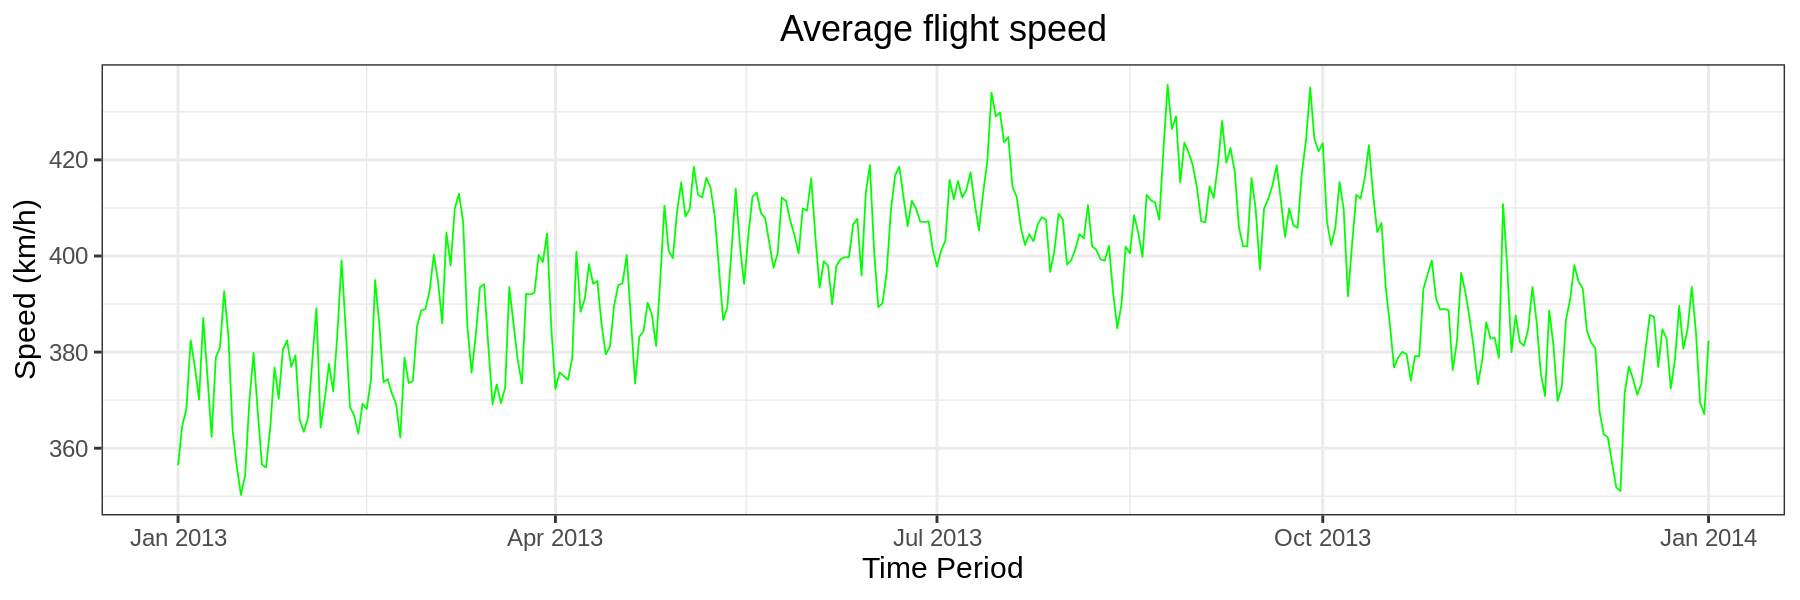

In [20]:
flight_speed = mutate(flights, speed = distance / air_time * 60)

# eliminate NA's
flight_speed = na.omit(flight_speed)

flight_speed |> group_by(date = as.Date(time_hour)) |>
                summarise(avg_speed = mean(speed))  -> flight_speed

# plot
speed = ggplot(flight_speed, aes(x = date, y = avg_speed)) + geom_line(color= "green") + labs(title = "Average flight speed", x = "Time Period", y = "Speed (km/h)") + theme_bw(base_size = 18)+ theme(plot.title=element_text(hjust=0.5))

options(repr.plot.width=15, repr.plot.height=5)
show(speed)

### 4. Analyze the flights offered by each airline company and determine:
- the airline companies offering the largest two numbers of flights per day and per week

In [21]:
flights |>  group_by(day = as.Date(time_hour), carrier) |>
            summarise(flights = n()) |>
            group_by(carrier) |>
            summarise(flights_day = mean(flights)) |>
            arrange(desc(flights_day)) |>
            slice(1:2) -> flight_day

flights |>  group_by(week = week(time_hour), carrier) |>
            summarise(flights = n()) |>
            group_by(carrier) |>
            summarise(flights_week = mean(flights)) |>
            arrange(desc(flights_week)) |>
            slice(1:2) -> flight_week

flight_day
flight_week

`summarise()` has grouped output by 'day'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'week'. You can override using the
`.groups` argument.


carrier flights_day
1 UA      160.2869   
2 B6      149.2760

carrier flights_week
1 UA      1106.887    
2 B6      1030.849

- the airline company offering the smallest number of flight per month

In [22]:
# month is already present as a table column
flights |>  group_by(month, carrier) |>
            summarise(flights = n()) |>
            group_by(carrier) |>
            summarise(flights_month = mean(flights)) |>
            arrange(flights_month) |>
            slice(1) -> flight_month

cat("The company with the smallest number of average flights per month is", flight_month$carrier, 'with', flight_month$flights_month, 'flights.' )
flight_month

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


The company with the smallest number of average flights per month is OO with 6.4 flights.

carrier flights_month
1 OO      6.4

- the airline company offering the longest distance flight per month

In [23]:
flights |> group_by(month, carrier) |>
           summarise(max_distance = max(distance)) |>
           group_by(month) |>
           filter(max_distance == max(max_distance)) -> longest_flights

longest_flights

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


month carrier max_distance
1   1    HA      4983        
2   2    HA      4983        
3   3    HA      4983        
4   4    HA      4983        
5   5    HA      4983        
6   6    HA      4983        
7   7    HA      4983        
8   8    HA      4983        
9   9    HA      4983        
10 10    HA      4983        
11 11    HA      4983        
12 12    HA      4983